# SENTIMENT ANALYSIS AND CLASSIFICATION PROJECT

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.

### Data Information
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

We may get predictions on whether customers recommend the product they purchased using the information in their review text. 

For further information please check out the link (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.)

## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [7]:
#!pip install matplotlib==3.4

In [8]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
import tensorflow as tf
import os
# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
#print("All devices: ", tf.config.list_logical_devices('TPU'))

In [14]:
strategy = tf.distribute.TPUStrategy(resolver) # TPU 

In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cansi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cansi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cansi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cansi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

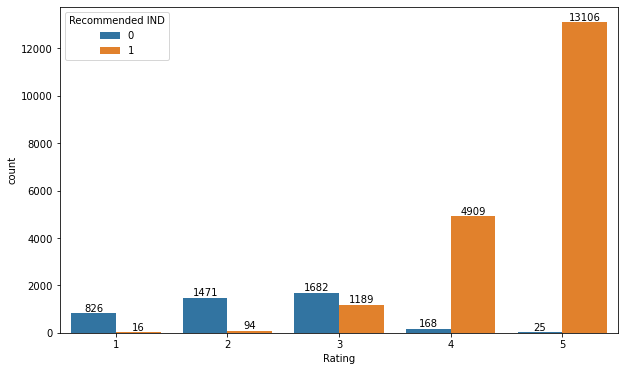

In [24]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [25]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [26]:
len(df)

23486

In [27]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)]) 

16

In [28]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [29]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

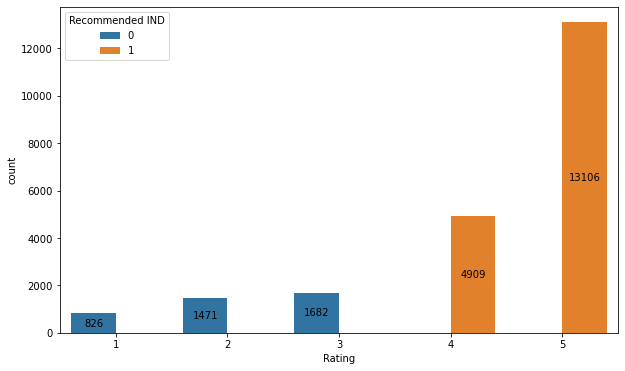

In [30]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

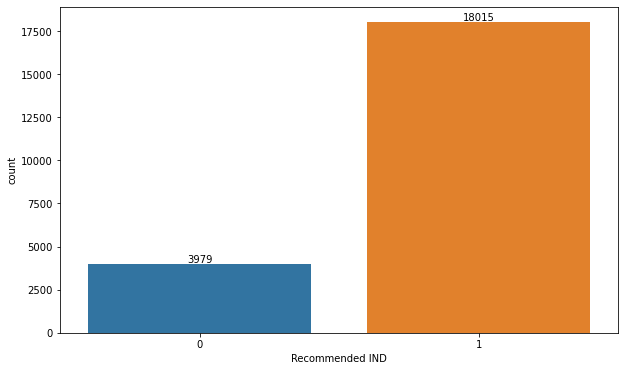

In [31]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

### Feature Selection and Rename Column Name

In [32]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [33]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [34]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [35]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [36]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


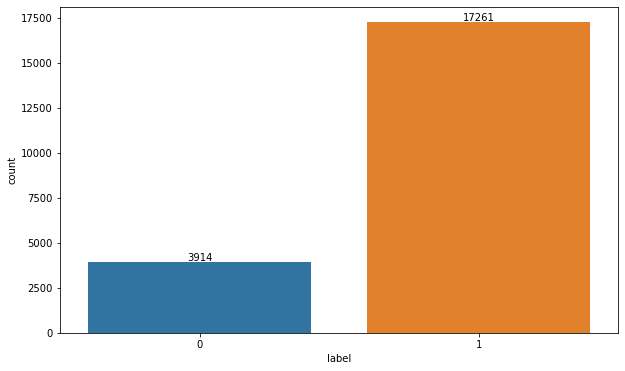

In [37]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

## 3. Text Mining

Here, we will follow 3 steps below
- **Tokenization:**(Word Tokenization and convert text to lowercase)
- **Noise Removal:**(Remove Punctuals, Special Characters and Numbers, stopwords(not including "not an no") 
- **Lexicon Normalization:**(Lemmatization) Note: There are two methods of lexicon normalization; **[Stemming or Lemmatization]

### Tokenization, Noise Removal, Lexicon Normalization

In [38]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
        stop_words.remove(i)

In [39]:
def cleaning(data):
    text_tokens = word_tokenize(data.replace("'", "").lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words
We'll create a Word Clouds for reviews, representing most common words in each target class.

### Detect Reviews (positive and negative separately)

In [40]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [41]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [42]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [43]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

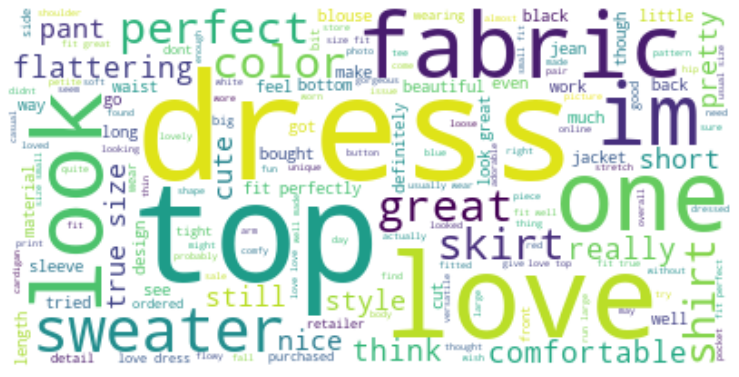

In [45]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)
wordcloud_positive.generate(positive_words)
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

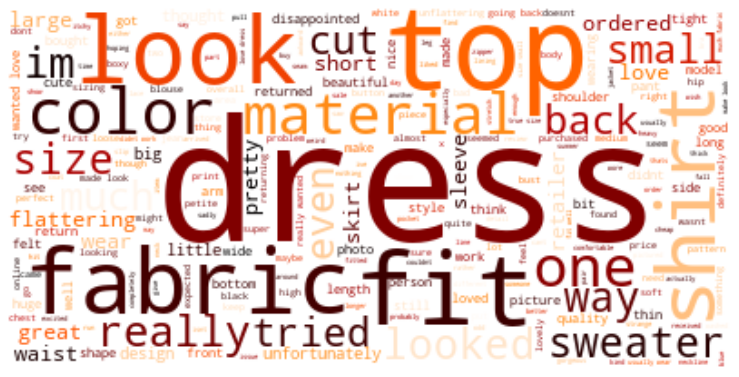

In [46]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')
wordcloud_negative.generate(negative_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

**For Machine Learning** We'll train all models using TFIDF and Count vectorizer,

**For Deep learning model**, We'll use embedding layer for all words.

**For BERT model**, We'll use TF tensors.


### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eval functions

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2991  461]
 [ 102  681]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring= ["accuracy", "f1", "recall", "precision"]
model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870720
train_accuracy     0.883458
test_f1            0.712579
train_f1           0.740939
test_recall        0.866500
train_recall       0.901700
test_precision     0.605250
train_precision    0.628829
dtype: float64

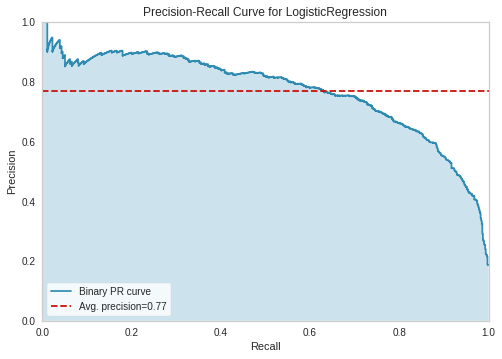

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2959  493]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.58      0.87      0.70       783

    accuracy                           0.86      4235
   macro avg       0.77      0.86      0.80      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.61      0.91      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.89      0.82     16940
weighted avg       0.91      0.88      0.88     16940



In [ ]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.865112
train_accuracy     0.874872
test_f1            0.707054
train_f1           0.728609
test_recall        0.880232
train_recall       0.908762
test_precision     0.590939
train_precision    0.608069
dtype: float64

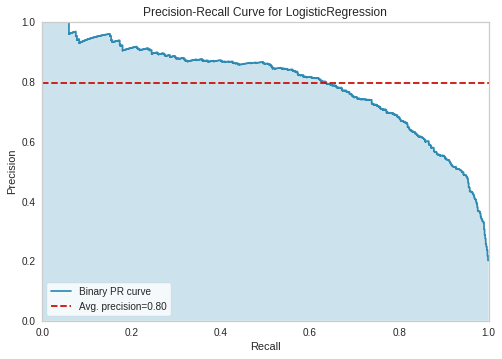

In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3229  223]
 [ 168  615]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3452
           1       0.73      0.79      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.76      0.84      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.93      0.92      0.92     16940



In [ ]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.905077
train_accuracy     0.923318
test_f1            0.754404
train_f1           0.801792
test_recall        0.788566
train_recall       0.839136
test_precision     0.723340
train_precision    0.767639
dtype: float64

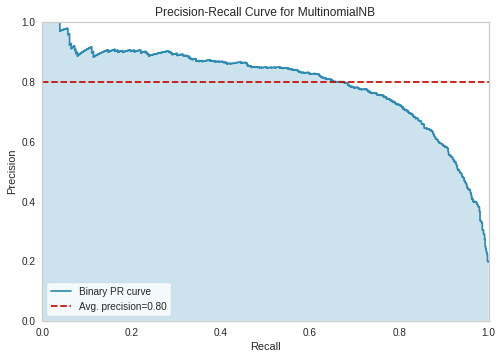

In [ ]:
viz = PrecisionRecallCurve(MultinomialNB(alpha=1.5))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3213  239]
 [ 177  606]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.77      0.74       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.91      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.84      0.79      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [ ]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.899055
train_accuracy     0.919704
test_f1            0.741184
train_f1           0.794805
test_recall        0.781861
train_recall       0.841371
test_precision     0.704736
train_precision    0.753128
dtype: float64

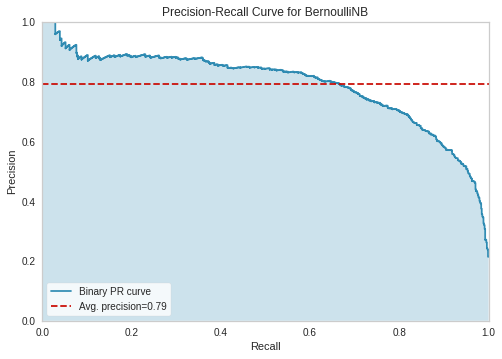

In [ ]:
viz = PrecisionRecallCurve(BernoulliNB(alpha=0.7))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2996  456]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [ ]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872963
train_accuracy     0.885131
test_f1            0.716858
train_f1           0.744512
test_recall        0.869372
train_recall       0.905533
test_precision     0.610020
train_precision    0.632113
dtype: float64

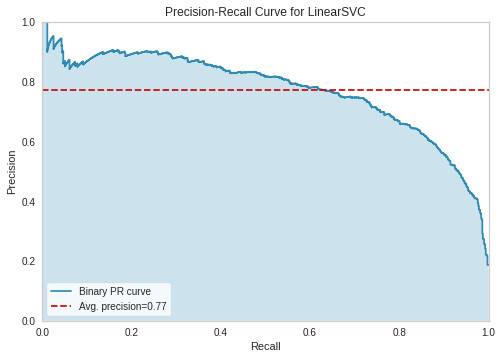

In [ ]:
viz = PrecisionRecallCurve(LinearSVC(C=0.001, class_weight="balanced", random_state=101))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3020  432]
 [  88  695]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3452
           1       0.62      0.89      0.73       783

    accuracy                           0.88      4235
   macro avg       0.79      0.88      0.82      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     13809
           1       0.66      0.93      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.86     16940
weighted avg       0.92      0.90      0.91     16940



In [ ]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883117
train_accuracy     0.899344
test_f1            0.737164
train_f1           0.774371
test_recall        0.886303
train_recall       0.934526
test_precision     0.631120
train_precision    0.661080
dtype: float64

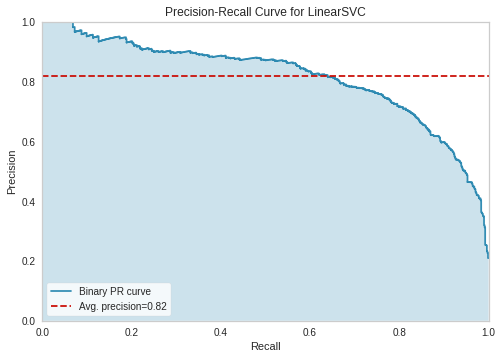

In [ ]:
viz = PrecisionRecallCurve(LinearSVC(C=0.03, class_weight="balanced", random_state=101))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2992  460]
 [ 144  639]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3452
           1       0.58      0.82      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.84      0.79      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.87      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.88      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [ ]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.865053
train_accuracy     0.889328
test_f1            0.691423
train_f1           0.745641
test_recall        0.816988
train_recall       0.877497
test_precision     0.599714
train_precision    0.648321
dtype: float64

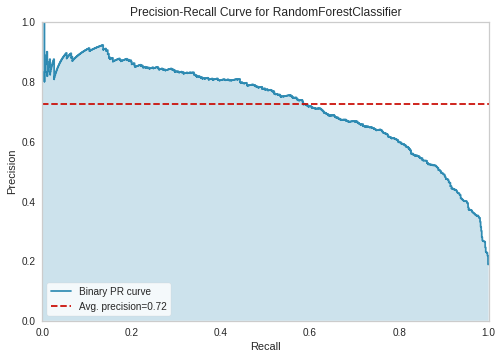

In [ ]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2933  519]
 [ 143  640]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3452
           1       0.55      0.82      0.66       783

    accuracy                           0.84      4235
   macro avg       0.75      0.83      0.78      4235
weighted avg       0.88      0.84      0.85      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.62      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [ ]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.852952
train_accuracy     0.886278
test_f1            0.670373
train_f1           0.744344
test_recall        0.808048
train_recall       0.895100
test_precision     0.573264
train_precision    0.637262
dtype: float64

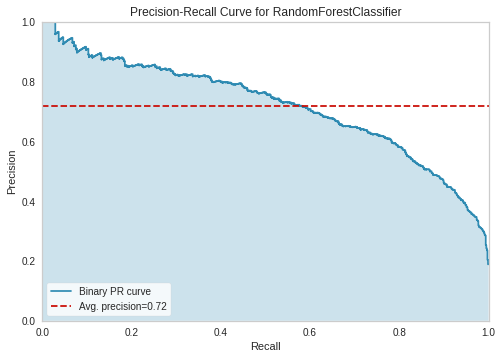

In [ ]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3305  147]
 [ 280  503]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.77      0.64      0.70       783

    accuracy                           0.90      4235
   macro avg       0.85      0.80      0.82      4235
weighted avg       0.89      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.79      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.92      0.93      0.92     16940



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.901181
train_accuracy     0.929037
test_f1            0.705764
train_f1           0.791762
test_recall        0.641640
train_recall       0.729940
test_precision     0.785008
train_precision    0.865041
dtype: float64

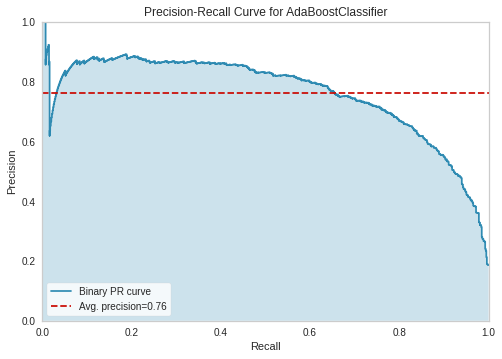

In [ ]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3299  153]
 [ 319  464]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3452
           1       0.75      0.59      0.66       783

    accuracy                           0.89      4235
   macro avg       0.83      0.77      0.80      4235
weighted avg       0.88      0.89      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [ ]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.893034
train_accuracy     0.913827
test_f1            0.675014
train_f1           0.742711
test_recall        0.601411
train_recall       0.672948
test_precision     0.770204
train_precision    0.828621
dtype: float64

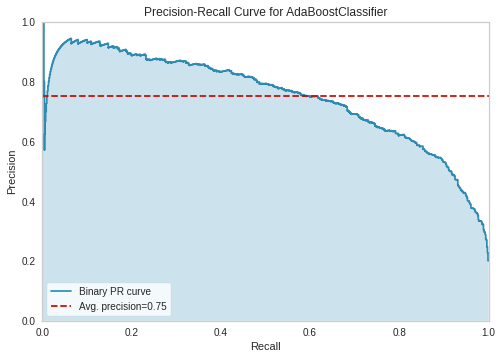

In [ ]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [ ]:
df.shape

(21175, 2)

### Tokenization

In [ ]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words) # filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [ ]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [ ]:
print(X_num_tokens[100])

[1, 80, 6, 473, 30, 5, 6, 390, 2, 24, 1, 1909, 486, 47, 3, 21, 5, 2, 238, 2140, 198, 190, 545, 14, 90, 3, 870, 311, 4, 276, 108, 5, 74, 124, 8, 22, 30, 2, 240, 31, 4, 46, 9, 76, 102, 151, 5, 6, 1, 2848, 78, 149, 9, 1, 204, 2, 43, 318, 7, 25, 4, 264, 264]


### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[100])

63

In [ ]:
len(X_num_tokens[150])

30

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.mean()

60.2330106257379

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

15213

In [ ]:
X[15213]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [ ]:
max_tokens = 116

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [ ]:
X_pad.shape

(21175, 116)

In [ ]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [ ]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [ ]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [ ]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens))
model.add(Dropout(0.2))
model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=0.001)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["Recall"])

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 116, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 1, restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 33s 175ms/step - loss: 0.4626 - recall: 0.8061 - val_loss: 0.2912 - val_recall: 0.8875
Epoch 2/25
149/149 [==============================] - 25s 168ms/step - loss: 0.2517 - recall: 0.9208 - val_loss: 0.3042 - val_recall: 0.8824
Epoch 2: early stopping


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.462641,0.806131,0.291183,0.887468
1,0.251723,0.920806,0.304185,0.882353


<AxesSubplot:>

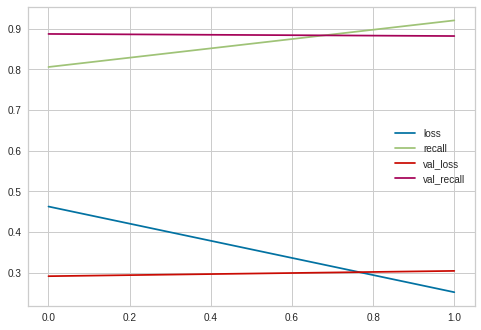

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 2s 25ms/step
[[1515  212]
 [  44  347]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1727
           1       0.62      0.89      0.73       391

    accuracy                           0.88      2118
   macro avg       0.80      0.88      0.83      2118
weighted avg       0.91      0.88      0.89      2118



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 12s 20ms/step
[[13941  1593]
 [  292  3231]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     15534
           1       0.67      0.92      0.77      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.91      0.86     19057
weighted avg       0.92      0.90      0.91     19057



67/67 [==============================] - 1s 19ms/step


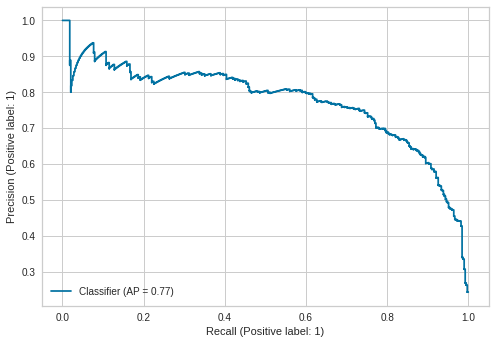

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)

0.7740698958257268

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 51.4 MB/s 
     |████████████████████████████████| 163 kB 64.6 MB/s 


### Tokenization

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
max_token = []
for sent in X:
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))
print('Max sentence length: ', max(max_token))

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [ ]:
np.array(max_token).mean()

76.31556080283353

In [ ]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [ ]:
def transformation(X):
  seq_len = 162
  num_samples = len(X)
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True) 
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)
Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensor

In [ ]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Xids, Xmask, labels):
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Batch Size

In [ ]:
batch_size = 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')         
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32') 
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]
    x = Dense(80, activation='relu')(embeddings)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)
    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  optimizer = Adam(learning_rate=2e-5)
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [ ]:
history = model3.fit(train_ds2, validation_data= val_ds, epochs=1) 

596/596 [==============================] - 201s 199ms/step - loss: 0.1955 - recall: 0.7335 - val_loss: 0.1569 - val_recall: 0.9003


## Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model3.predict(val_ds) >= 0.5
print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 158ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1727
           1       0.82      0.90      0.86       391

    accuracy                           0.94      2118
   macro avg       0.90      0.93      0.91      2118
weighted avg       0.95      0.94      0.95      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5
print(classification_report(y_train2, y_train_pred)) 

596/596 [==============================] - 23s 37ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15534
           1       0.89      0.95      0.92      3523

    accuracy                           0.97     19057
   macro avg       0.94      0.96      0.95     19057
weighted avg       0.97      0.97      0.97     19057



67/67 [==============================] - 3s 30ms/step


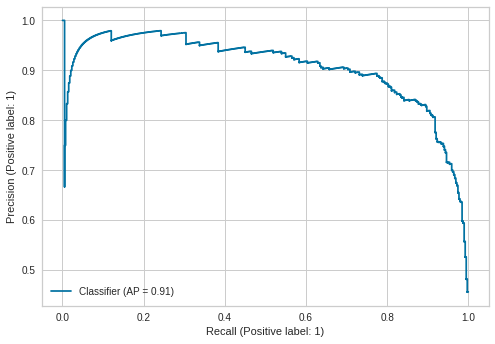

In [ ]:
y_pred_proba = model3.predict(val_ds)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.9053331068835816

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## BERT Model with Weighted

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.2, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)
    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  optimizer = Adam(learning_rate=2e-5)
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [ ]:
weights = {0:1, 1:3}

In [ ]:
history = model3.fit(train_ds2, validation_data= val_ds, epochs=1, class_weight=weights)

596/596 [==============================] - 208s 204ms/step - loss: 0.3365 - recall_2: 0.8677 - val_loss: 0.1591 - val_recall_2: 0.9258


In [ ]:
y_pred = model3.predict(val_ds) >= 0.5
print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 167ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1727
           1       0.78      0.93      0.85       391

    accuracy                           0.94      2118
   macro avg       0.88      0.93      0.90      2118
weighted avg       0.94      0.94      0.94      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5
print(classification_report(y_train2, y_train_pred)) 

596/596 [==============================] - 23s 37ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15534
           1       0.83      0.97      0.89      3523

    accuracy                           0.96     19057
   macro avg       0.91      0.96      0.93     19057
weighted avg       0.96      0.96      0.96     19057



In [ ]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

67/67 [==============================] - 3s 30ms/step


0.9084811115831579

In [ ]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

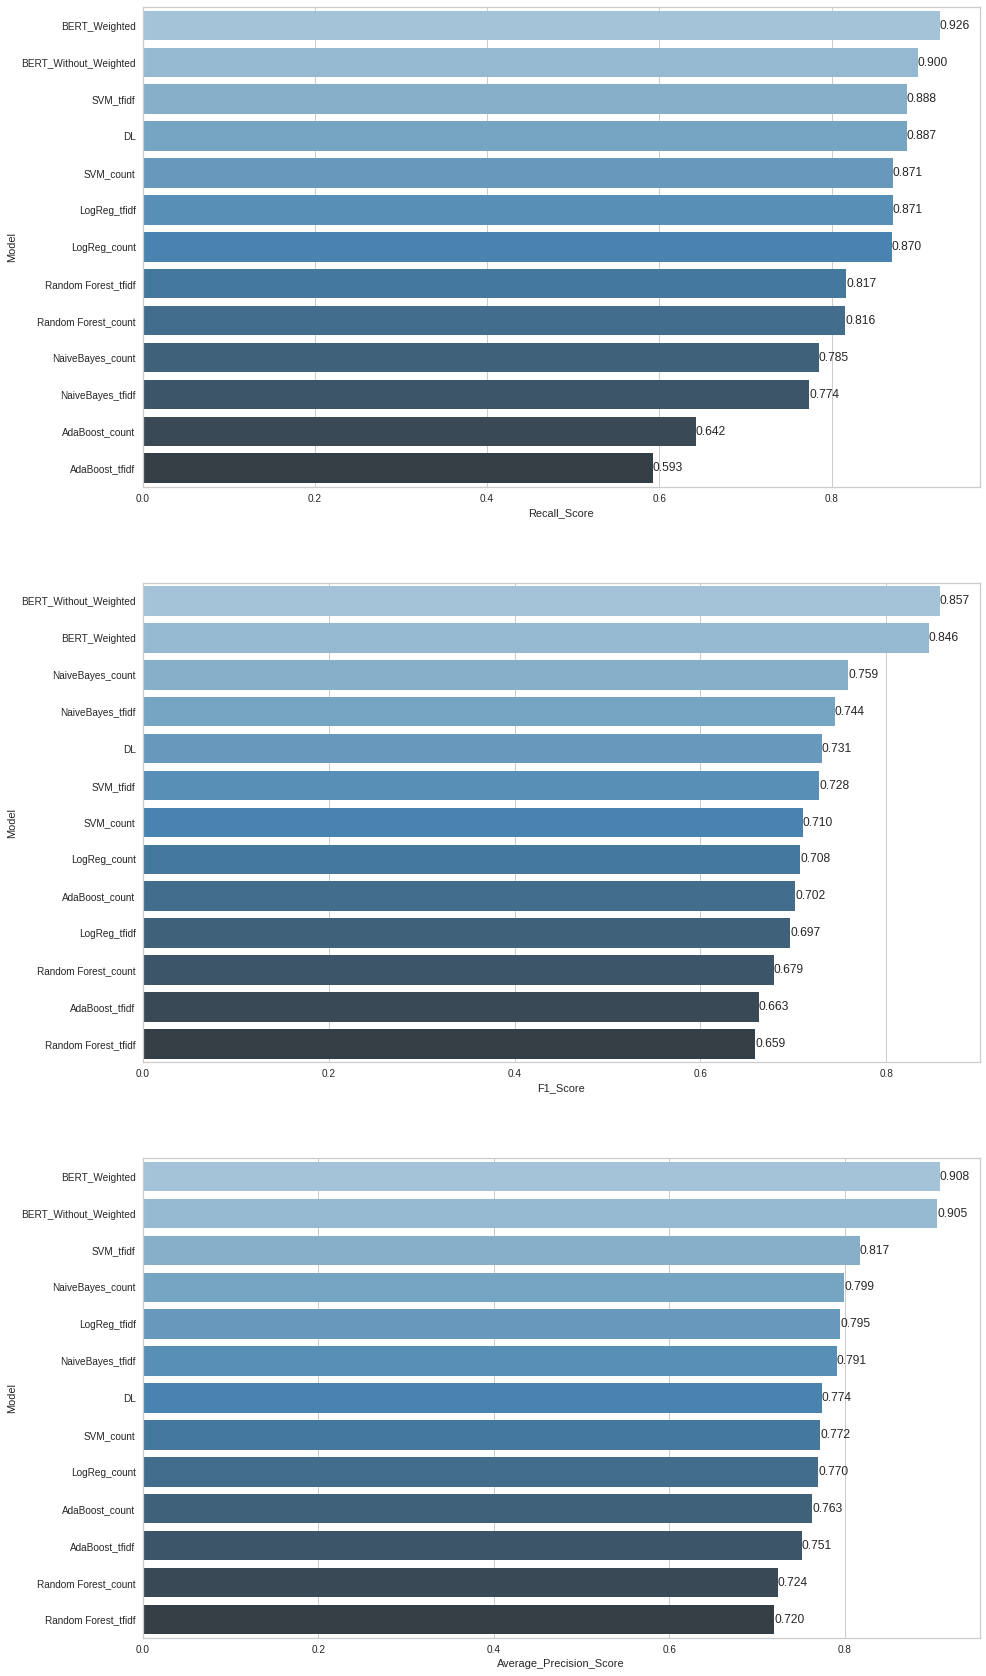

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## BERT Large Uncased

In [ ]:
# If we would like to apply Bert large model. Different codes as below;
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")
# from transformers import TFAutoModel
# model = TFAutoModel.from_pretrained("bert-large-uncased")

Thank you for your time